# Obtenção dos Dados

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/tx/austin/2019-11-12/visualisations/listings.csv')

# Análise dos Dados

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,225,30,24,2019-03-16,0.18,3,0
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,100,30,9,2018-03-14,0.07,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,95,2,508,2019-10-28,3.90,1,304
3,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45596,-97.78370,Private room,40,1,257,2019-11-03,2.20,1,13
4,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24829,-97.73726,Entire home/apt,99,3,104,2019-11-05,0.86,1,14


### Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

In [0]:
# identificar o volume de dados do DataFrame
print('Variáveis:\t ', df.shape[0])
print('Entradas:\t', df.shape[1])
print('\n')

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Variáveis:	  11250
Entradas:	 16




id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Q2. Qual a porcentagem de valores ausentes no dataset?

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.196711
last_review                       0.196711
host_name                         0.000267
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### Q3. Qual o tipo de distribuição das variáveis?

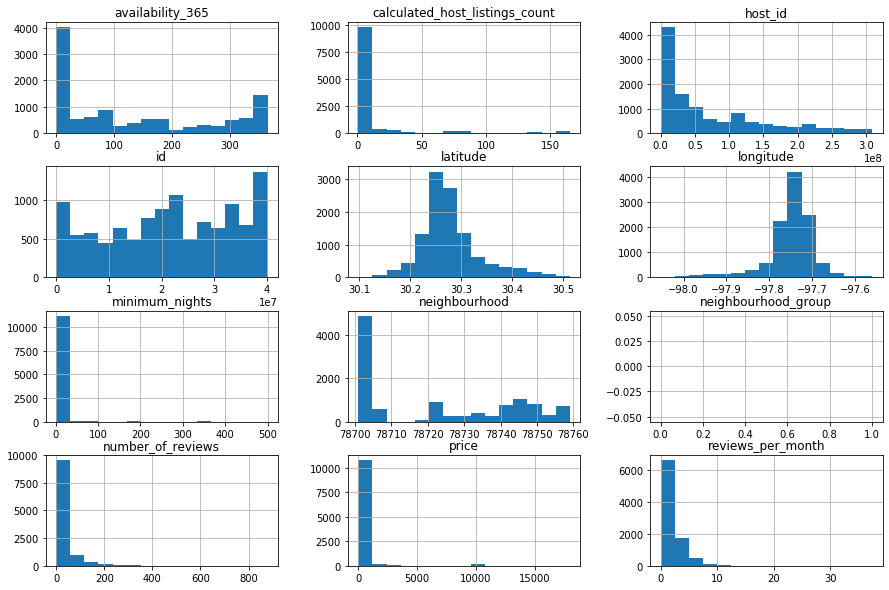

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### Q4. Há outliers presentes?

In [0]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
   'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11250.000000,11250.000000,11250.000000,9037.000000,11250.000000,11250.000000
mean,428.851556,5.072089,30.190489,1.782883,10.200711,133.116444
std,1295.733573,17.334828,59.664593,2.096243,28.247721,134.691628
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,80.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,140.000000,2.000000,7.000000,1.020000,1.000000,87.000000
75%,300.000000,2.000000,31.000000,2.650000,3.000000,266.000000
max,17999.000000,500.000000,879.000000,37.360000,165.000000,365.000000


### Q5. Qual a média dos preços de aluguel?

In [0]:
# ver a média da coluna `price``
df.price.mean()

428.85155555555554

### Q6. Qual a correlação existente entre as variáveis

In [0]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
   'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.005056,-0.072081,0.056281,0.628767,0.097805
minimum_nights,-0.005056,1.000000,-0.057057,-0.115762,-0.018994,0.101622
number_of_reviews,-0.072081,-0.057057,1.000000,0.560741,-0.069180,0.146431
reviews_per_month,0.056281,-0.115762,0.560741,1.000000,0.039597,0.111554
calculated_host_listings_count,0.628767,-0.018994,-0.069180,0.039597,1.000000,0.277725
availability_365,0.097805,0.101622,0.146431,0.111554,0.277725,1.000000


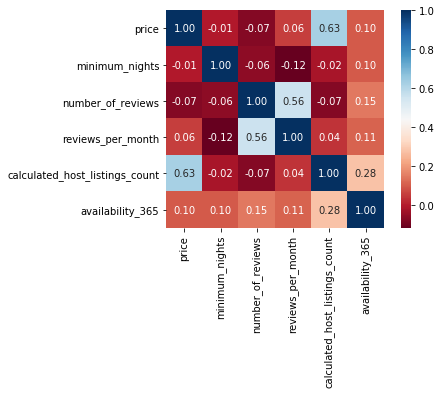

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### Q7. Qual o tipo de imóvel mais alugado no Airbnb?

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    8399
Private room       2588
Shared room         176
Hotel room           87
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.746578
Private room       0.230044
Shared room        0.015644
Hotel room         0.007733
Name: room_type, dtype: float64

### Q8. Qual a localidade mais cara do dataset?

In [0]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
78733    1351.902439
78746    1085.963455
78752     876.314815
78730     827.615385
78732     766.959184
78722     682.878378
78758     669.747619
78703     648.493174
78705     644.687813
78741     535.000000
Name: price, dtype: float64

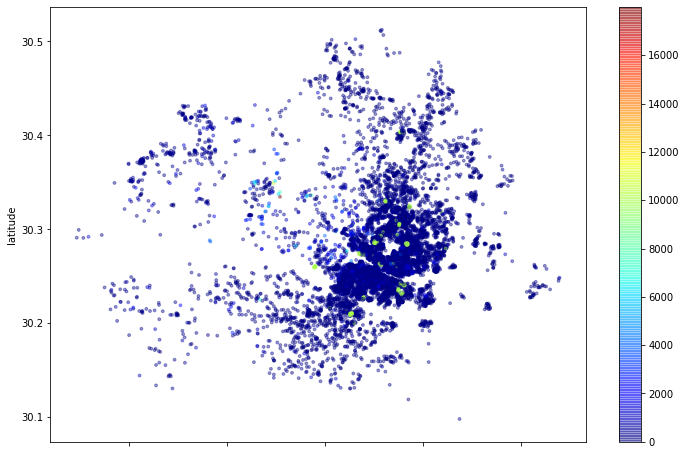

In [0]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

### Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?

In [0]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

5.072088888888889